# Competition #1: Milestone Report

## Research Question
   *What are the determinants of IPO underpricing phenomena?*
   
## Business Understanding
When presented with this business question, our first task was to better understand the question at hand. We started by researching the IPO underpricing phenomena to familiarize ourselves with the business question and standard IPO terminology. Underpricing occurs when the price of an initial public offering (IPO) is lower than the price of the first trade. Many believe that underpriced IPOs leave money on the table for corporations, but some believe that underpricing is inevitable. An Initial Public Offering (IPO) is a critical moment for a company. A firm going public relies on the capital raised in its IPO to grow and thrive. The stakes also are high for other parties. Investors can reap huge profits or sustain big losses. For the firm’s owners and managers, as well as the venture capitalists with a stake in the firm and the investment bankers who underwrite the sale, careers and fortunes can be made. It is in the interest of investment banks to underprice an IPO because it nurtures ties to institutional investors, who are often repeat customers of the banks and who benefit directly from the underpricing. 
   
In a recently published paper, Hoskisson and his co-authors, Jonathan D. Arthurs of Washington State University, Lowell W. Busenitz of the University of Oklahoma, and Richard A. Johnson of the University of Missouri, use agency theory to craft a series of hypotheses about the behavior of the players in an IPO. The hypotheses focus on the boards of directors of companies, which are made up of insiders and outsiders, many of whom have different motivations, according to the authors. The researchers challenged the widely held notion that having outsiders on a board is good for a company that is going public. Since the Enron debacle and similar scandals, regulators and legislators have put in place measures requiring more outsiders on boards. Outsider staffing or outsider majorities now are required on auditing committees and other key committees of publicly traded firms.

But in an IPO, outsiders actually are the ones looking for short-term gains, and the insiders, or managers of a firm, are the players with the long-term vision a young and growing company needs, the researchers believe. The institutional investors usually will cash out in a matter of days, and the venture capitalists typically have exited the company within six months on average. On the other hand, the managers will be with the company long after the IPO, and they have an interest in seeing the venture succeed in the long run, according to the authors.

However, all this background information into the underpricing phenomena does not answer the research question of can it be predicted? According to Hoskisson “Fifteen percent of all these ventures is a lot of money on the table. It’s all going to institutional investors who usually flip the shares in the first couple of days”. Being able to predict when an underpricing of an IPO will occur has the potential to benefit both parties. Venture capitalists, investment banks will be able to predict if and when a new IPO will result in underpricing and thus be able to make money on the stocks going up, whereas the companies themselves will be able to take defensive action if they beleive they will fall victim to this phenomena.
   
## Data Understanding   
   Our next step was to study the data dictionary provided. What variables were we provided with to predict the determinants of underpricing? The dataset provided had 682 records, and 22 attributes. Variable data types included Continuous/Float, Binary/Boolean, and Text. We aimed to get a better understanding of the types of variables provided along with their definitions, not only to help us determine whether instances in our dataset seemed incorrect, but also so that we may come up with hypotheses of which variables we thought may make the best predictors. Once we gained a better idea of the data that was provided via the data dictionary and general research, we moved on to inspecting the actual dataset. We started this task by reading the data into python, previewing the loaded dataframe, inspecting the datatypes each variable mapped to, running descriptive statistics on the dataset, and finally creating histograms for each variable.

In [102]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from new_var import calc,y1function,y2function,C3function,C6function
from outliers import outlier
from Standardising import standard
from Recoding_SIC_Codes import Industry_Division 
%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split

# Read in Data file and define NaN values
ipo_data = pd.read_excel("Competition #1 Raw Data_UPDATED I3.xlsx",header=0,na_values='-' )
ipo_data.I3 = ipo_data.I3.astype(object) # Converting to object for the moment to tidy up summary statistics
# Run Descriptive Statistics on Data File
#print(ipo_data.dtypes)
print(ipo_data.dtypes)

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


One extremely important point the authors of this report wish to make is that there is a mistake in the data dictionary. The variable *I3* is coded as text in the dictionary when it is fact an integer variable representing industry codes for the companies. The reason for this is that some company's codes have been erroneously entered in the data set, possessing multiple codes with commas separating the codes. There are two mistakes here, the first being have multiple codes and the second using commas to separate as this is converting the field to a text or object field. One member of our team painstakingly went through the missing and incorrect codes and corrected them in the raw data file. This allowed us to read in *I3* correctly as an int variable. We converted to an object for this next section as it is a categorical variable an it does not possess summary statistics.

In [103]:
# Printing summary statistics
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


The resulting table above led us to several immediate takeaways:
* Variables *T2* to *T5* have incorrect minimums. We know this to be true due to examining the data. Upon inspection it became clear that, as an example, *T2*, which is Number of Words in MD&A section of a company's IPO prospectus cannot be 0, especially when we look at these particular cases *T3* - *T5* variables and see numbers greater than 0. Additionally it is also impossible for these variables to have a negative word count. Based on this evidence, it was decided to treat values of this nature as "Missing"
* *P(H)*, was displaying a minimum of 0. Given that this is the upper bound of the IPO price range, this value must be incorrect
* There may be instances where *P(L)* is higher than *P(H)*, which would be incorrect, as the upper bound of the price range could not be lower than the lower bound of the range
* Many attributes had maximum values that seemed dramatically high given the mean and interquartile range provided such as *C3* and *C7* 
* *C6* has some unusually high values
* As the purpose of this study is to predict the underpricing phenonium, it is important to note that the mean value of *P(IPO)* is less than the mean value of *P(1Day)*
* The max of the S1 filings variable (*C1*) is for over five years in the future. Considering companies typically can get this completed within six months, this was viewed as an error
* Our target and control variables would need to be created

These immediate takeaways gave us a better foundation of where our data stood, and gave us ideas of where to next investigate anomalies and outliers within each attribute and record.

Next we look at the frequncy breakdown of our industry indicators in the variable *I3*:

In [104]:
# Returns the frequency
ipo_data.I3.value_counts()

2834    76
7372    49
3674    36
7389    35
3841    30
1311    18
7374    14
3845    14
7373    13
5812    11
7371    10
4899    10
2836    10
4412    10
8731     9
5600     8
8200     7
2860     7
4813     7
3663     7
3661     6
7370     6
7359     6
8742     6
3825     5
7310     5
7011     5
3577     5
1389     5
3842     5
        ..
8060     1
2711     1
7830     1
3728     1
3672     1
3442     1
2741     1
3452     1
8011     1
5063     1
7363     1
2821     1
7361     1
5712     1
2080     1
3411     1
2810     1
3510     1
7510     1
5010     1
4953     1
6331     1
4955     1
3620     1
5047     1
3569     1
1600     1
2750     1
1382     1
5500     1
Name: I3, Length: 184, dtype: int64

As we can see, the code 2834 has the largest frequncy of 76. Another key feature to note is the length, we have a 184 unique values. This will require some recoding later along with some research in to the codes in order to determine which range of codes correspond to which sectors in order to reduce the number of categories. This is discussed in the Recoding SIC Codes section of this report.

Next we examine hthe missingness of our data. We know that their is 682 records in our data, so using this value we can calulate the percentage of missing data for each variable.

In [105]:
# Generating a print statement to highlight the issing of our data
for i in range(len(ipo_data.columns)):
    j = ipo_data.columns[i]
    miss=((682-ipo_data[str(j)].count())/682)*100
    print("The missingness of variable {}".format(j))
    print("{0:.2f}%".format(miss))

The missingness of variable I1
0.00%
The missingness of variable I2
0.00%
The missingness of variable I3
0.00%
The missingness of variable P(IPO)
0.73%
The missingness of variable P(H)
1.47%
The missingness of variable P(L)
1.47%
The missingness of variable P(1Day)
3.23%
The missingness of variable C1
3.23%
The missingness of variable C2
3.23%
The missingness of variable C3
5.28%
The missingness of variable C4
3.23%
The missingness of variable C5
0.88%
The missingness of variable C6
0.88%
The missingness of variable C7
10.56%
The missingness of variable T1
0.15%
The missingness of variable T2
0.15%
The missingness of variable T3
0.15%
The missingness of variable T4
0.15%
The missingness of variable T5
0.15%
The missingness of variable S1
0.15%
The missingness of variable S2
0.15%
The missingness of variable S3
0.15%


As we can see, the column with the largest amount of missing data is *C7* or the Sales field with 10.56%. The columns related to sentences and word counts appear quite small, but as we know, there are unnoticed missing values as 0 and -1 should be classified as missing but are in fact counted in this case.

Before we begin preparing our data for modelling but before that we look at the shapes of our distributions for our continuous variables. It is important to note we drop the NaN values for these plots to be generated as the Python histogram function does not deal with missing data well. Later in this report, we will see how we actually dealt with the missing data.

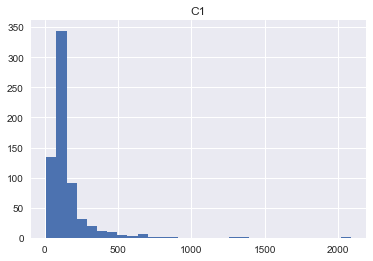

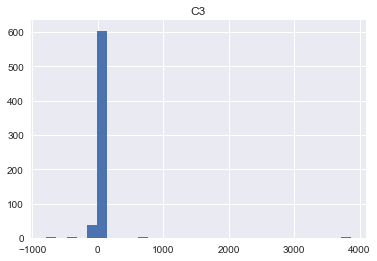

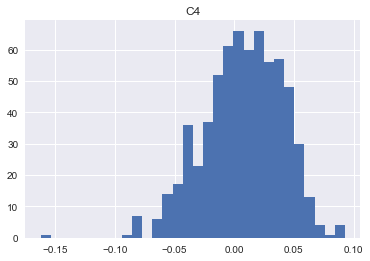

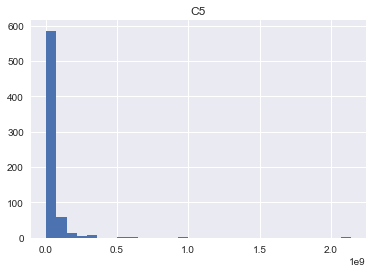

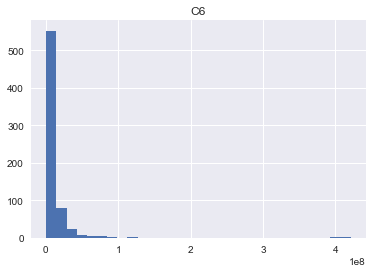

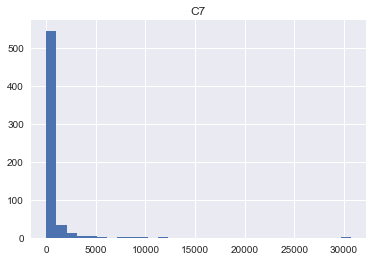

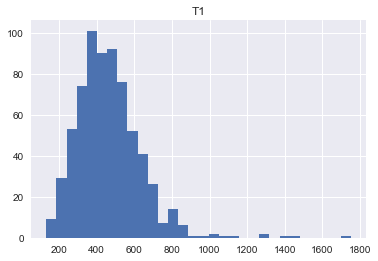

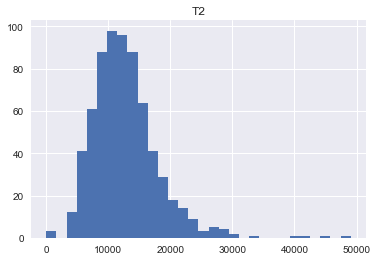

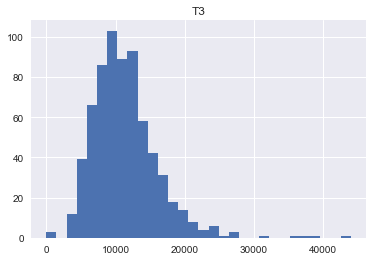

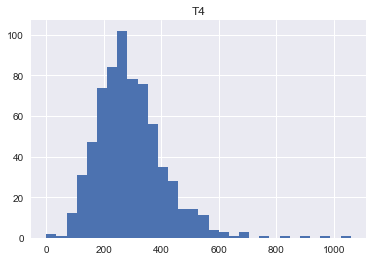

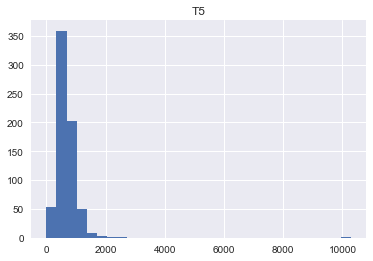

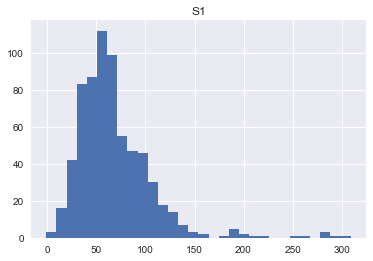

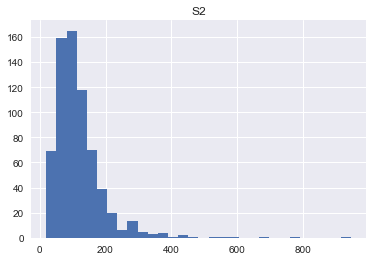

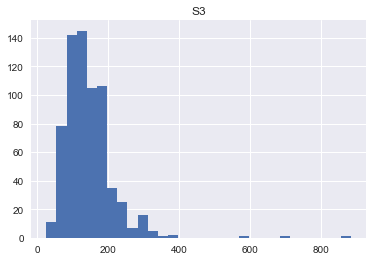

In [106]:
cont_var=['C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3'] #Variables that need to be normalized
cont_plot=ipo_data[cont_var]

# plotting our variables
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
       
        plt.title('%s' % cont_plot.columns[i])
       
        plt.show()

As we can see, much of our data is heavily skewed. This is due in part to the presence of outliers and extreme values that exist in our data set. For example, look at the histogram for the variable *T5*, and notice the outlier at the 10000 mark which is some considerable distance away from the rest of our distribution but nonetheless, is a part of the distribution and thus creates the skewness in our data. The data that is the least skewed is *C4*, but a slight left skew still exists.

In the next section we move onto data preperation. This involves imputing missing data, dealing with outliers, normalising our data and other such tasks that are all completed to increase the accuracy of our logistic regression models.

## Data Preperation 
Once we gained a better understanding of our data, we were able to move forward with preparing the data based on our findings. We decided to utlize multiple methods in each of the suggested tasks provided, as well as some others.

### Imputation
When replacing missing values, our methods depended on the data type of the specific variable in question. For descriptive attributes like *I3*, we conducted research to find the correct identification numbers and then manually updated our dataset. For Continuous/Float variables, we used a python script to replace the missing variables with their respective means, as this is a dependable procedure when dealing with missing values. For the purposes of this report, we arbitrarily choose the mean for our benchmark model, but replacing with the median is an equally acceptable method.

Additionally, negative and zero values in the *T1* to *S1* columns are removed as these are believed to be errors in the data. We feel justified in this as researching the forms, it is our understanding that these are mandatory sections to be completed, confirming our belief that these are errors. Removing negatives was done because it is impossible to have a negative word total, thus we believe it is either there in error or to represent missing. As the variable *C2* is a binary variable, it was decided to replace the missing values with "1" as it is far more common value than 0 based on the summary statistics.

In [107]:
# Replacing NaN in C2 with 1 
ipo_data['C2']=ipo_data['C2'].fillna(1)

# Replace NaN values with mean
ipo_data=ipo_data.fillna(ipo_data.mean())

# Removing negative and 0 values for the word/sentence counts as it is beleived that these are errors
# Removing 0 and negatives for T' calculations        
ipo_data['T2']=ipo_data['T2'].mask(ipo_data['T2'] <= 0,ipo_data['T2'].mean())
ipo_data['T1']=ipo_data['T1'].mask(ipo_data['T1'] <= 0,ipo_data['T1'].mean())
ipo_data['T3']=ipo_data['T3'].mask(ipo_data['T3'] <= 0,ipo_data['T3'].mean())
ipo_data['T4']=ipo_data['T4'].mask(ipo_data['T4'] <= 0,ipo_data['T4'].mean())
ipo_data['T5']=ipo_data['T5'].mask(ipo_data['T5'] <= 0,ipo_data['T5'].mean())
ipo_data['S1']=ipo_data['S1'].mask(ipo_data['S1'] <= 0,ipo_data['S1'].mean())

# We can now look at more representive descriptive statistics
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.863636,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12796.021729,11445.972694,295.217099,680.217655,68.52323,120.104258,144.759178
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.343426,158.308600,0.032775,1.039156e+08,2.501761e+07,1558.767222,175.612567,5401.439280,4776.337830,120.388060,471.846488,38.97700,84.766654,69.225403
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,3003.000000,70.000000,167.000000,5.00000,20.000000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8238.500000,214.000000,463.250000,45.00000,73.000000,100.000000
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.070000,0.007282,2.759165e+07,7.500000e+06,134.738000,444.500000,12064.000000,10811.000000,280.000000,625.500000,60.00000,100.500000,134.000000
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.600000,0.030941,4.938184e+07,1.208721e+07,500.459962,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.75000,141.750000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.00000,944.000000,883.000000


### Variable Creation
Based on the provided data dictionary, we created two target variables, and three control Variables:
#### Target
 1. Y1 - Binary variable, set to 1 if the IPO offer price is less than the mid range of the IPO price
 2. Y2 - Binary variables, set to 1 if the IPO offer price is less than the first day trading price
 
#### Control
 1. C3x - Binary variable, set to 1 if Earnings per Share is positive
 2. C5x - Continuous/Float variable, representing the share overhang
 3. C6x - Continuous/Float variable, representing the up revision
 
Additionally, we also converted all our count variables in *T1*-*T5* and *S1*-*S3* into ratios for better statisitic analysis.
 
 [New Variable Creation](https://github.com/ConorFeeney/IS540-Code/blob/master/new_var.py) 

In [108]:
# Creating our target and control variables
ipo_data['Y1'] = ipo_data.apply(y1function, axis=1)
ipo_data['Y2'] = ipo_data.apply(y2function, axis=1)
ipo_data['C3x'] = ipo_data.apply(C3function, axis=1)
ipo_data['C6x'] = ipo_data.apply(C6function, axis=1)

#Creating ratios for the words, sentences and postive/negative counts. Ratios provide insight
calc(ipo_data)

#Removing redundent data
del ipo_data['C3']
del ipo_data['C5']
del ipo_data['C6']
del ipo_data['T1']
del ipo_data['T2']
del ipo_data['T3']
del ipo_data['T4']
del ipo_data['T5']
del ipo_data['S1']
del ipo_data['S2']
del ipo_data['S3']

#Looking at the new description of the data
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,C7,Y1,Y2,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.863636,0.007282,500.459962,0.513196,0.708211,0.536657,0.052708,4.627711,0.918940,0.629873,0.080693,0.005504,0.009179,0.011854
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.343426,0.032775,1558.767222,0.500193,0.454919,0.499020,0.107639,6.245584,0.624282,0.076265,0.744766,0.004784,0.004324,0.008970
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-0.162352,0.074000,0.000000,0.000000,0.000000,0.000000,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.013352,41.511500,0.000000,0.000000,0.000000,0.000000,2.853439,0.883578,0.580815,0.047413,0.004154,0.007031,0.009570
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.007282,134.738000,1.000000,1.000000,1.000000,0.000000,3.770051,0.897133,0.629077,0.051901,0.005069,0.008600,0.011305
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.030941,500.459962,1.000000,1.000000,1.000000,0.071429,4.865080,0.909732,0.674852,0.056471,0.006258,0.010535,0.012883
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,0.092896,30683.000000,1.000000,1.000000,1.000000,1.000000,99.787255,17.165085,1.443089,19.500949,0.121442,0.091082,0.233397


As we created several new variables, for example, we create *T3x* which is the ratio of Real Words to Total Words, we felt justified in removing the variable *T3* from our data set as it would be covered in all future analysis by *T3x*. This was done to keep our data frame tidy. This logic was also applied for *T4* (now *T4x*, ratio of long sentences to total sentences), *T5* (now *T5x*, ratio of long words to total words), *S1* (now *S1x*, ratio of positive words to total words), *S2* (now *S2x*, ratio of negative words to total words) and *S3* (now *S3x*, ratio of uncertain words to total words). Finally we removed *T1* and *T2* as these were the total counts for words and sentences that were used to create these ratio variables.

As we read in our data, some variables were not read correctly in terms of types so we changed their type to be more appropriate and then printed the types of all our variables in order to ensure we were happy with them.

In [109]:
# Converting C6x and C2 to correct type
ipo_data.C6x = ipo_data.C6x.astype(float)

ipo_data.C2 = ipo_data.C2.astype(int)
print(ipo_data.dtypes) # checking the types

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2           int32
C4         float64
C7         float64
Y1           int64
Y2           int64
C3x          int64
C6x        float64
C5x        float64
T3x        float64
T4x        float64
T5x        float64
S1x        float64
S2x        float64
S3x        float64
dtype: object


### Normalization

Most statistical methods (the parametric methods) include the assumption that the sample is drawn from a population where the values have a Normal distribution. One of the first steps of statistical analysis of your data is therefore to check the distribution of the different variables.

Upon completing the task of daeling with missing values and errors in the data, it was decided to move on to normalizing our data, followed by dealing with outliers and finally standardising our data.

The Normal distribution is symmetrical, not very peaked or very flat-topped, and if we exam the charts below we can see that our data is often skewed. 


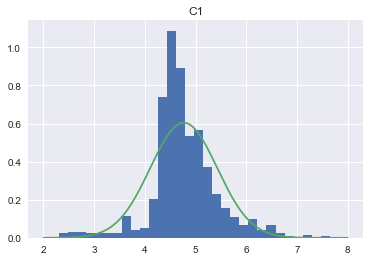

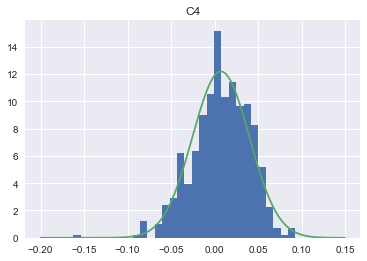

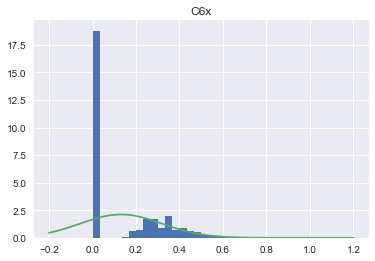

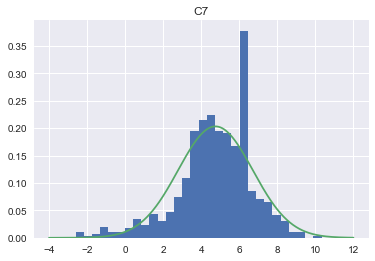

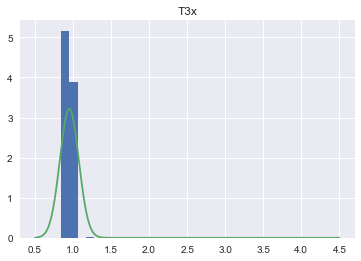

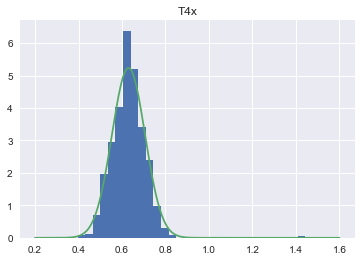

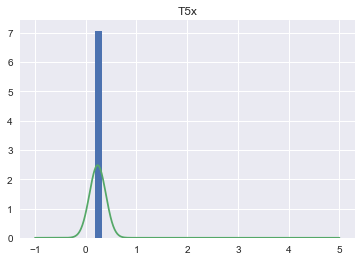

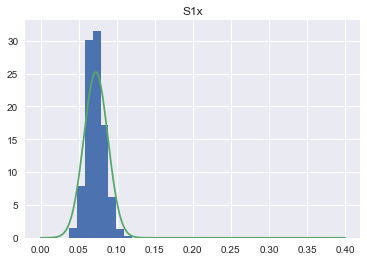

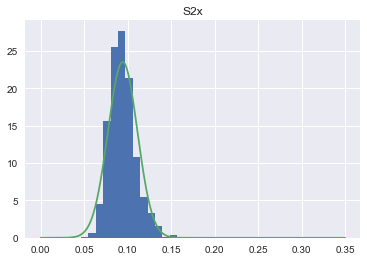

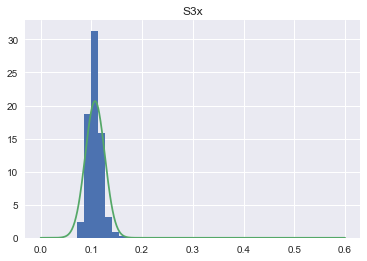

In [115]:
normal_var=['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x'] #Variables that need to be normalized
norm_plot=ipo_data[normal_var]
for i in range(len(norm_plot.columns)):
        plt.hist(norm_plot.iloc[:,i],bins=30,normed=True)
        xt = plt.xticks()[0]  
        xmin, xmax = min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(norm_plot.iloc[:,i]))
        plt.title('%s' % norm_plot.columns[i])
        # lets try the normal distribution first
        m, s = stats.norm.fit(norm_plot.iloc[:,i]) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        plt.plot(lnspc, pdf_g, label="Norm")
        plt.show()

Examining the charts we can note several points of interest. *C1*, *C6x*, *C7*, *T3x*, *T5x*, *S1x*-*S3x* are all heavily skewed to the right. This is more than likely caused by the presence of extreme values and outliers, which we will be dealing with in the next section. *T4x* is also right skewed, but far less so. The variable C4 is left skewed. For the purposes of our benchmark we will be dealing with this skewness using some powerful, but simple methods.

For dealing with skew, the following transformations perform well:
 * The **log** transformation (sometimes computed **log**(x+A) where A is some constant. This is done to deal with negative or 0 values.
 * The **Square Root** function
 * Converting to a **Fraction**, i.e. **1/x**
 * The **Powers** transformation

We can also use some combination thereof. For our base model, it was decided to keep things simple initially with a goal to revisit this section in the future after normal transformations have been built into our loop for the selection of the Logistic Regression model.

For right skewed data, the **log** transformation works well, and this was the selected transformation for our benchmark model for the severly right skewed data listed above. For C4 and T4x, it is suspected that if the outliers were dealt with, the data would become more normally distributed. As this is our benchmark, this was the decided approach with a view of returning to this as we seek to improve the model.

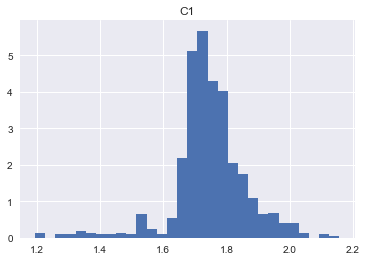

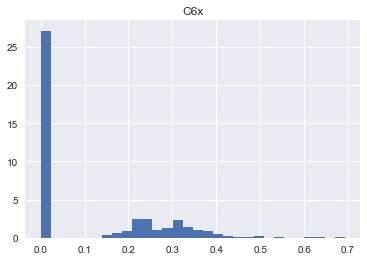

C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


ValueError: max must be larger than min in range parameter.

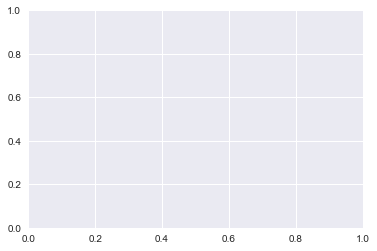

In [116]:
transform=['C1','C6x','C7','T3x','T5x','S1x','S2x','S3x'] #Variables that need to be normalized
norm_plot=ipo_data[transform]

# plotting our hists
for i in range(len(norm_plot.columns)):
        plt.hist(np.log(norm_plot.iloc[:,i]+1),bins=30,normed=True)
        plt.title('%s' % norm_plot.columns[i])
        plt.show()

In [117]:
ipo_data['T3x']

ipo_data['T3xbin'] = 0
ipo_data.loc[(ipo_data['T3x'] >= 0) & (ipo_data['T3x'] < .93),'T3xbin'] = 1
ipo_data.loc[(ipo_data['T3x'] >= .930001) & (ipo_data['T3x'] < .947), 'T3xbin'] = 2
ipo_data.loc[(ipo_data['T3x'] >= .947001) & (ipo_data['T3x'] < .953), 'T3xbin'] = 3
ipo_data.loc[ipo_data[ 'T3x'] >= .953001,'T3xbin'] = 4
ipo_data


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x,T3xbin
0,RA,RAILAMERICA INC /DE,4011,15.000000,18.00000,16.000000,13.750000,4.343805,1,0.005264,...,1,0.000000,2.470315,0.930519,0.710583,0.209455,0.082570,0.122955,0.081668,2
1,G,Genpact LTD,8742,14.000000,18.00000,16.000000,16.750000,4.418841,1,-0.053282,...,1,0.000000,5.848265,0.951474,0.561622,0.218425,0.077702,0.086114,0.109887,3
2,HURN,Huron Consulting Group Inc.,8742,15.000000,16.00000,14.000000,18.900000,5.030438,1,0.024642,...,0,0.000000,3.257192,0.935035,0.719745,0.229877,0.055644,0.070385,0.090297,2
3,ICFI,"ICF International, Inc.",8742,12.000000,16.00000,14.000000,12.250000,4.941642,1,0.051895,...,1,0.000000,2.772191,0.953768,0.576159,0.227785,0.075398,0.081162,0.126022,4
4,SRVY,GREENFIELD ONLINE INC,8742,13.000000,15.00000,13.000000,18.700001,4.553877,1,-0.050492,...,1,0.000000,3.292713,0.948466,0.650367,0.219304,0.081974,0.095998,0.109543,3
5,WAGE,"WAGEWORKS, INC.",8742,9.000000,12.00000,10.000000,12.600000,5.942799,0,-0.025335,...,1,0.000000,3.959010,0.963174,0.700148,0.226021,0.081070,0.089255,0.107940,4
6,XPRT,LECG CORP,8742,17.000000,16.00000,14.000000,21.030001,4.394449,1,0.057756,...,0,0.365148,2.740591,0.942230,0.638596,0.224547,0.045193,0.076628,0.108368,2
7,BHRT,"U.S. Stem Cell, Inc.",8731,5.250000,16.00000,14.000000,5.000000,5.916202,0,-0.016128,...,0,0.000000,13.133762,0.953676,0.647059,0.208805,0.065061,0.088254,0.092011,4
8,GEVO,"Gevo, Inc.",8731,15.000000,15.00000,13.000000,246.600250,5.198497,1,0.029861,...,0,0.267261,3.446204,0.944664,0.703065,0.231959,0.073435,0.092102,0.102679,2
9,GNOM,COMPLETE GENOMICS INC,8731,9.000000,14.00000,12.000000,8.030000,4.644391,1,0.050257,...,0,0.000000,4.301513,0.955416,0.720682,0.233702,0.064203,0.099463,0.118094,4


As we can see, the **log** transformation has worked quite well for some of our variables. *C1*, *C7* look to be much more normally distributed. The remainder still need some work, their issue being a high percentage of a zero value. Trying the **Square Root** function we get the following results:

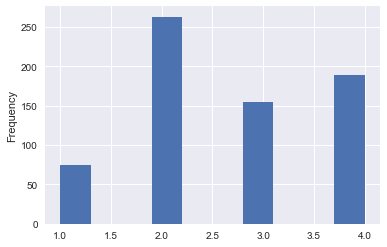

In [120]:
ipo_data['T3xbin'].plot(kind='hist')

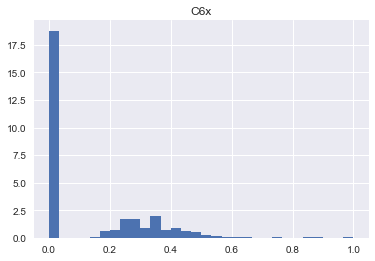

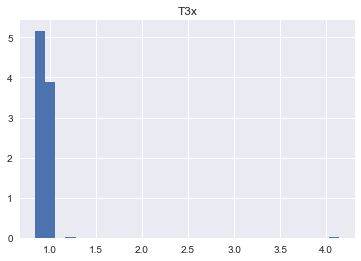

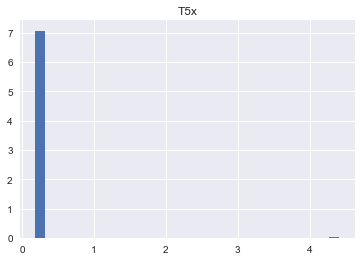

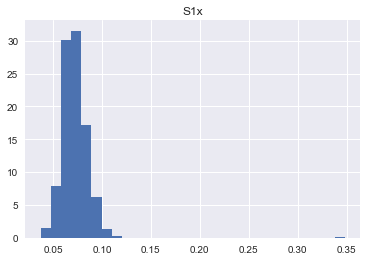

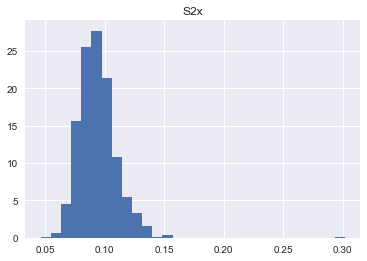

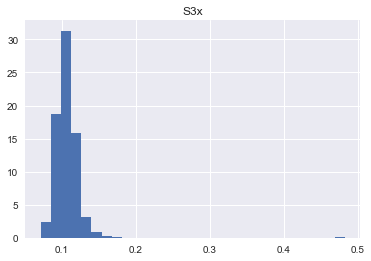

In [113]:
transform=['C6x','T3x','T5x','S1x','S2x','S3x'] #Variables that need to be normalized
norm_plot=ipo_data[transform]

# plotting our hists
for i in range(len(norm_plot.columns)):
        plt.hist(norm_plot.iloc[:,i]**0.5,bins=30,normed=True)
        plt.title('%s' % norm_plot.columns[i])
        plt.show()

It was decided to square root the remaining variables. The justification was that the square root appeared to make more normal the *S1x-S3x* variables. As for *C6x*, *T3x* and *T5x* variables, clearly standard transformations will not work on these and will require further research into methods such as binning. For the purposes of our base model, it was decided to keep them square rooted.

In [114]:
sqrt_transform=['C6x','T3x','T5x','S1x','S2x','S3x'] #Variables that need to be square rooted
ipo_data[sqrt_transform]=ipo_data[sqrt_transform]**0.5 #square rooting variable

log_transform=['C1','C7'] #Variables to be log transformed
ipo_data[log_transform]=np.log(ipo_data[log_transform])#log transformation

# Viewing new summary statistics
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,C7,Y1,Y2,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x,T3xbin
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,4.765815,0.863636,0.007282,4.748030,0.513196,0.708211,0.536657,0.130972,4.627711,0.950572,0.629873,0.234036,0.072485,0.094300,0.107151,1.043988
std,6.031467,6.604398,5.792641,72.042293,0.660942,0.343426,0.032775,1.965899,0.500193,0.454919,0.499020,0.188697,6.245584,0.123996,0.076265,0.161114,0.015820,0.016951,0.019313,0.283362
min,3.000000,0.000000,3.000000,0.000000,2.302585,0.000000,-0.162352,-2.603690,0.000000,0.000000,0.000000,0.000000,0.283223,0.839002,0.395480,0.177751,0.037268,0.046394,0.071590,1.000000
25%,10.000000,13.000000,11.000000,11.092500,4.442651,1.000000,-0.013352,3.725969,0.000000,0.000000,0.000000,0.000000,2.853439,0.939988,0.580815,0.217746,0.064454,0.083854,0.097826,1.000000
50%,13.500000,15.481190,13.000000,15.000000,4.700480,1.000000,0.007282,4.903310,1.000000,1.000000,1.000000,0.000000,3.770051,0.947171,0.629077,0.227818,0.071197,0.092735,0.106324,1.000000
75%,17.000000,17.000000,15.000000,21.030001,5.028799,1.000000,0.030941,6.215528,1.000000,1.000000,1.000000,0.267261,4.865080,0.953799,0.674852,0.237637,0.079108,0.102638,0.113504,1.000000
max,85.000000,135.000000,108.000000,1159.200562,7.643483,1.000000,0.092896,10.331464,1.000000,1.000000,1.000000,1.000000,99.787255,4.143077,1.443089,4.415988,0.348485,0.301797,0.483111,4.000000


### Outliers
In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution, as we saw in the last section, it caused some weighted tails in certain variables.  Outlier points can therefore indicate faulty data, erroneous procedures, or areas where a certain theory might not be valid.  However, in large samples, a small number of outliers is to be expected (and not due to any anomalous condition). There are methods that can deal with outliers, thankfully. While outliers are expected; extreme illogical data constitute faulty data. A negative return of 786 EPS in the case of NeuroMetrix, Inc. indicate faulty data. Through careful examination we can separate faulty data from outliers.

To deal with outliers, we plan on using the following methods for various data versions:
 1. Calculating the points that are greater than or less than 3 standard deviations
   away from the mean and setting any values outside this range to the upper / lower bound, respectively.
 2. Calculating the points that are greater than or less than 3 standard deviations
   away from the mean and setting any values outside this range to the mean
 3. Calculating the Interquartile Range and finding values outside the limits Q1-IQR*1.5 and Q3+IQR*1.5 
   and setting to be the mean
 4. Calculating the Interquartile Range and finding values outside the limits Q1-IQR*1.5 and Q3+IQR*1.5 
    and setting to be the Q1 or Q3, respectively.

 [Outliers](https://github.com/ConorFeeney/IS540-Code/blob/master/outliers.py) 

As we are generating two models, the script to deal with outliers is done in that section. This is due to as each model has different target variables, meaning, the same outlier method produce different accuracy results for the two models. Thus we use differing methods for each model in order to maximise our model's accuracy.

### Standardization
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data pre-processing step. Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Bearing all this mind, we felt that this could only help improve our model accuracy.

To standardize, we developed code for three different methods:
 * Min/Max scaling
 * Zscore standardization
 * Decimal scaling
 
[Standardising Function](https://github.com/ConorFeeney/IS540-Code/blob/master/Standardising.py) 

Our standardisation function still has some work needed, but for the purposes of our benchmark model, it suffices.

### Recoding
During the data understanding step, we realized that *I3*, or the Standard Industry Classification codes for each record, was not populated and/or incorrect for instances. After correcting these instances, we were able to match to an Industry Division based on the codes. This allowed us to recode the *I3* column to a categorical variable of industry divisions, that we will later be able to use as a way of clustering the records prior to modeling, to hopefully improve the model fit. However, this was not completed for the base model as this was a recent development to our data. As we saw earlier, there were over 180 unique SI codes, which is a significant amount. It was decided to do some research in an attempt to find a method to aggregate codes together in order to create a more manageable number.

Thankfully one was obtained. We can aggregate these codes up to a "Division" level as shown in the table below.

| Range of SIC Codes | Division                                                           |
|--------------------|--------------------------------------------------------------------|
| 0100-0999          | Agriculture, Forestry and Fishing                                  |
| 1000-1499          | Mining                                                             |
| 1500-1799          | Construction                                                       |
| 1800-1999          | Not Used                                                           |
| 2000-3999          | Manufacturing                                                      |
| 4000-4999          | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199          | Wholesale Trade                                                    |
| 5200-5999          | Retail Trade                                                       |
| 6000-6799          | Finance, Insurance and Real Estate                                 |
| 7000-8999          | Services                                                           |
| 9100-9729          | Public Administration                                              |
| 9900-9999          | Non Classifiable                                                   |


We created an external function to do this recoding for us, which can be found in the link below.

[Recoding SIC Column](https://github.com/ConorFeeney/IS540-Code/blob/master/Recoding_SIC_Codes.py) 

In [81]:
# Add the new data to the end of the table
ipo_data.I3 = ipo_data.I3.astype(int) # recoding to correct type

# applying our function to recode our industry codes to sector level
ipo_data['IndDivision'] = ipo_data.apply(Industry_Division, axis=1) 
print(ipo_data.head(5))

     I1                           I2    I3  P(IPO)  P(H)  P(L)    P(1Day)  \
0    RA         RAILAMERICA INC /DE   4011    15.0  18.0  16.0  13.750000   
1     G                 Genpact LTD   8742    14.0  18.0  16.0  16.750000   
2  HURN  Huron Consulting Group Inc.  8742    15.0  16.0  14.0  18.900000   
3  ICFI     ICF International, Inc.   8742    12.0  16.0  14.0  12.250000   
4  SRVY       GREENFIELD ONLINE INC   8742    13.0  15.0  13.0  18.700001   

         C1  C2        C4                        ...                          \
0  4.343805   1  0.005264                        ...                           
1  4.418841   1 -0.053282                        ...                           
2  5.030438   1  0.024642                        ...                           
3  4.941642   1  0.051895                        ...                           
4  4.553877   1 -0.050492                        ...                           

        C5x       T3x       T4x       T5x       S1x     

## Correlation analysis
Next, we needed to select the predictor variables with low pair-wise correlation values. In order to do this, we used Spearman's correlation test to determine the statistical dependence between the rankings of pairs of variables.

In [82]:
corr=['C1','C4','C6x','C7','T3x','T4x','T5x','S1x','S2x','S3x','Y1','Y2']
ipo_data[corr].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,C1,C4,C6x,C7,T3x,T4x,T5x,S1x,S2x,S3x,Y1,Y2
C1,1.0,0.091,-0.064,0.053,-0.058,0.055,0.031,0.033,0.048,-0.026,0.07,0.0048
C4,0.091,1.0,0.093,0.018,0.057,0.085,0.062,0.0012,0.0041,0.039,-0.071,0.1
C6x,-0.064,0.093,1.0,-0.054,-0.039,-0.024,-0.098,-0.081,-0.12,-0.045,-0.77,0.24
C7,0.053,0.018,-0.054,1.0,-0.12,0.1,-0.11,0.087,0.19,-0.07,0.003,-0.054
T3x,-0.058,0.057,-0.039,-0.12,1.0,-0.11,0.45,0.19,0.074,0.37,0.11,-0.016
T4x,0.055,0.085,-0.024,0.1,-0.11,1.0,-0.086,0.07,-0.024,-0.091,0.073,-0.01
T5x,0.031,0.062,-0.098,-0.11,0.45,-0.086,1.0,0.18,0.16,0.41,0.12,-0.018
S1x,0.033,0.0012,-0.081,0.087,0.19,0.07,0.18,1.0,0.13,0.2,0.11,-0.042
S2x,0.048,0.0041,-0.12,0.19,0.074,-0.024,0.16,0.13,1.0,0.14,0.18,-0.1
S3x,-0.026,0.039,-0.045,-0.07,0.37,-0.091,0.41,0.2,0.14,1.0,0.062,0.046


Our correlation analysis is still in early stages, and still requires significant work. At present, we only have completed a 'Spearman' correlation analysis between continious variables and our target variables. In the final paper, we plan to have completed chi tests for comparing our categorical variables and comparing our continious with our categorical variables we will attempt to use ANOVA. 

To discuss the above we some strong correlations. Note that the predictor variable *C6x* is strongly correlated with the target variable *Y1*. Our next strongest correlations come from *T3x* and *T5x*, and *S3x* with both *T3x* and *T5x*. These correlations make sense as they relate to types of words, for example, *S3x* is related to uncertain words (in terms of sentiment), which would have some correlation with both long and real words. In particular, long words coupled with uncertain words could be correlated due to that technical words tend be "long" and would have no sentiment associated with them. 

Due to the early stages of our correlation analysis, our only action from this data is to drop the variable *C6x* as a predictor for the model identified with target variable *Y1*, as it may weaken the effect from other variables

### Data Prep Summary
After experimenting with each method in the suggested tasks, we decided the best approach for our model would be to utlize different combinations and orders of each in a series of models and evaluate performance along the way. In order to do this easily, we created functions for each step that will iterate through each method, and selected the results that produced the most optimal results. The code for the iterative loop observing the different methods modelling results can be found [here](https://github.com/ConorFeeney/IS540-Code/blob/master/Model%20For%20loop.ipynb).

Based on the above the above, the models were generated as thus:

## Model Generation
### Y1 Logistic Regression Model
It was decided to keep all variables for the model creation as we are conducting a predictive analysis. Currently there is one exception, and this is due to the high correlation found. *C6x* is not used in the model *Y1* as it may weaken the impact of the other predictor variables.

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Optimization terminated successfully.
         Current function value: 0.656310
         Iterations 6
[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y1   No. Observations:                  682
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                           10
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                 0.05267
Time:                        20:52:30   Log-Likelihood:                -447.60
converged:                       True   LL-Null:                       -472.49
                                        LLR p-value:                 2.942e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C3x           -0

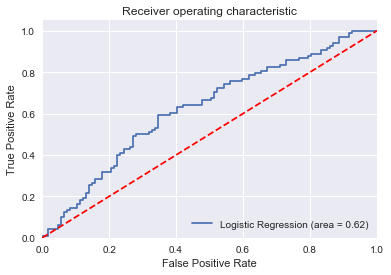

In [15]:
# Creating a copy of our data frame to avoid errors in the Y2 model
ipo_data_y1=pd.DataFrame.copy(ipo_data)

# for loop to deal with outliers in float variables
for i in range(len(ipo_data_y1.columns)): 
    if ipo_data_y1.iloc[:,i].dtype == float:
        outlier(ipo_data_y1.iloc[:,i],1) 
        
# for loop to standardise  float variables        
for i in range(len(ipo_data_y1.columns)): 
    if ipo_data_y1.iloc[:,i].dtype == float:  
        ipo_data_y1.iloc[:,i]=standard(ipo_data_y1.iloc[:,i],1)
        
# Our Logistic Regression model with results for Y1      
logreg = LogisticRegression()
# we removed C6x due to high correlation
train=['C3x','C4','C1','C7','T3x','T4x','T5x','S1x','S2x','S3x','C2']


# Setting our predictors
X=ipo_data_y1[train]

# Setting our Targer
y=ipo_data_y1['Y1']

# Using recursive feature selection to aide in the selection of predictors
rfe = RFE(logreg, 18)
rfe = rfe.fit(X,y)

# Implementing the model
logit_model=sm.Logit(ipo_data_y1['Y1'],ipo_data_y1[train])
result=logit_model.fit()

# Dividing our data set into testing and training, with our test set being of size 0.3. Then fitting the model
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)

# Predicting the test set results and calculating the accuracy
y1_pred = logreg.predict(X1_test)

# Using a seven fold cross validation to avoid overfitting and train our model
kfold = model_selection.KFold(n_splits=7, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X1_train, y1_train, cv=kfold, scoring=scoring)

# Doing a confusion matrix to see our correct and incorrect placements
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)

# Printing results
print(rfe.support_)
print(rfe.ranking_)
print(result.summary())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(confusion_matrix_y1)
print(classification_report(y1_test, y1_pred))

# Calculating our AUC/ROC and showing the graph
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

As we can see, there is a lot of output here. The first bit of output relates to Recursive Feature Elimination (RFE) and this is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features. As we can see all of our selected variables come back with "True".

Next we have some statistical output that relates to our model. We see the log Likelihood, and r-squared valus. Beneath these we see our table containing the value of our coefficients in the "coeff" column. As we are attempting to predict, as opposed to explain, it was decided to keep all variables in the model. 

After this, predicting the test set results and calculating the accuracy is carried out and we obtain a value of 0.61. Following, we utilise cross validation. Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model. The score we receive for this is 0.583, idicating that the average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well. Before we move onto the F1 score and AUC we generate a confusion matrix and observe 64+62 (126) correct predictions and 36+43 (79) in incorrect predictions.

Before we look at the F1 score here are some pointers to remember:
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
* The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
For the Y1 target variable we had an F1 score of 0.61.

Finally we observe the ROC or AUC. The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 

In the next block of code, we create a model for the *Y2* target variable. However, due to the in-balance in the outcomes of *Y2*, where around 70% of the values are "1", it was decided to reduce the number of records in the data set, specifically reducing those with the value 1. This was done to provide a closer to 50/50 split in the data so that the model would not become overly biased towards predicting "1" for our test set.

C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\Tim\Desktop\project on\IS540-Code\Scratch Files\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Optimization terminated successfully.
         Current function value: 0.630440
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y2   No. Observations:                  382
Model:                          Logit   Df Residuals:                      370
Method:                           MLE   Df Model:                           11
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                 0.08931
Time:                        20:52:32   Log-Likelihood:                -240.83
converged:                       True   LL-Null:                       -264.45
                                        LLR p-value:                 1.951e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C3x     

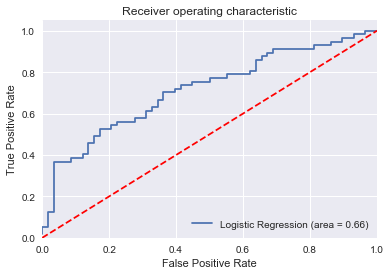

In [16]:
# Creating a copy of our data frame to avoid errors in the Y2 model
ipo_data_y2=pd.DataFrame.copy(ipo_data)

# Subsetting the data in order to create a balanced data set between Y2 = 1 and Y2 = 0
df_subset = ipo_data_y2.loc[ipo_data_y2['Y2'] == 1].sample(300)
ipo_data_y2 = ipo_data_y2.drop(df_subset.index)

# for loop to deal with outliers in float variables
for i in range(len(ipo_data_y2.columns)): 
    if ipo_data_y2.iloc[:,i].dtype == float:
        outlier(ipo_data_y2.iloc[:,i],4) 
        
# for loop to standardise  float variables        
for i in range(len(ipo_data_y2.columns)): 
    if ipo_data_y2.iloc[:,i].dtype == float:  
        ipo_data_y2.iloc[:,i]=standard(ipo_data_y2.iloc[:,i],1)
        
# Our Logistic Regression model with results for y2      
logreg = LogisticRegression()
# This is our  predictor variables,
train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']



# Setting our predictors
X=ipo_data_y2[train]

# Setting our Targer
y=ipo_data_y2['Y2']

# Using recursive feature selection to aide in the selection of predictors
rfe = RFE(logreg, 18)
rfe = rfe.fit(X,y)

# Implementing the model
logit_model=sm.Logit(ipo_data_y2['Y2'],ipo_data_y2[train])
result=logit_model.fit()

# Dividing our data set into testing and training, with our test set being of size 0.3. Then fitting the model
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)

# Predicting the test set results and calculating the accuracy
y2_pred = logreg.predict(X2_test)

# Using a seven fold cross validation to avoid overfitting and train our model
kfold = model_selection.KFold(n_splits=7, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X2_train, y2_train, cv=kfold, scoring=scoring)

# Doing a confusion matrix to see our correct and incorrect placements
confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)

# Printing results
print(rfe.support_)
print(rfe.ranking_)
print(result.summary())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X2_test, y2_test)))
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(confusion_matrix_y2)
print(classification_report(y2_test, y2_pred))

# Calculating our AUC/ROC and showing the graph
logit_roc_auc = roc_auc_score(y2_test, logreg.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logreg.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Notice that for the four variables we use, RFE deems them to be significant. The four variables we have selected are again all statistically significant, and the approach to select these four is identical to the one used in the previous model.

After this, predicting the test set results and calculating the accuracy is carried out and we obtain a value of 0.61. Following, we utilise cross validation. The score we receive for this is 0.637, idicating that the average accuracy remains close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well. Before we move onto the F1 score and AUC we generate a confusion matrix and observe 41+29 (70) correct predictions and 19+26 (45) in incorrect predictions.

For the Y2 target variable we had an F1 score of 0.61.

Finally we oberseve the ROC or AUC.  

### Conclusion and Next Steps
As we can see, we have accomplished a decent chunk of work in this first few weeks of this project. We have dealt with missing data, both the official NaN and more hidden ones like negative values in the number of words variables. This was done by replacing the missing values with the mean (except in the case of the dummy variable *C2* as discussed earlier). After this we began our data preperation for modelling.

In this section we did a number of tasks, initially we began by attempting to normalise our continuous varaibles using the **log** and **square root** transformations to a acceptable degree success for our base model. We have shown the four methods of how we have dealt with outlies discussed in the Outliers section, as well as shown the three methods of standardising the data with the min - max method for example. We began our recoding of the *I3* variable and successfully recoded it into its sector level. We also  initiated our correlation analysis between continious variables.

Finally we generated models for *Y1* and *Y2* respectively. We held a discussion of the results as well as a brief introduction to our accuracy measures with their respective accuracy scores.

As next steps for this project we intend to examine additionally methods of imputing missing such as replacing with the median and using linear regression. For the small number of variables that could not be reasonable normalised through simple transformations, we will attempt to use binning in hopes to improve the model by improving these variables as logistic regression is heavily dependent on normal data. 

Next, we intend to create dummy variables for our sector level categorical variables for the companies and include this variable in our model analysis. We will continue to expand our correlation analysis in an effort to find other significant relationships between predictor and target variables by comparing continuous with categorical variables and categorical with categorical variables.

Finally we will use these improvements and new variables with our models to attempt to increase the accuracy of our logistic regression model. Ideally we will obtain as strong as a score as possible using logistic regression but we will also explore the neural network approach to modelling in an effort to create the most accurate model, as well as decision trees.

### Workload Breakdown
In terms of team work and fair sharing of the load, the team is working quite well. We meet at least once a week to give progress reports along with regular updates via email, calls and texts. We critique each other, and help each other when one or more is struggling.

Please see below a brief breakdown of the work carried out by our team thus far, with guidelines for future steps:
#### Completed Tasks
* Tim: Began code for normalisation, Coded outlier method 3 + 4, z score standardising, read in data and completed initial analysis, recoded days variable
* Danielle: Coded outlier method 1+2, decimal scaling standardising, manually imputed I3 column in raw data and created code for target and control variables
* Conor: Tidied outlier code into function, coded min max standardisation, coded initial correlation analysis and coded logistic regression model

This report was written as a team. Danielle wrote the initial first draft, with particular emphasis on her tasks. Tim re-drafted Danielles report and added information to his tasks, Conor completed final draft and added information to his completed tasks.

#### Future Tasks
* Tim: Creation of dummy variables for Days, I3 and binning of variables discussed in normalisation. Taking over of Logistic Regression model to improve using these results
* Danielle: Completing correlation analysis, aiding Tim in logistic regression model as needed, researching and implementing another model generation method (Naive Bayes / Neural network)
* Conor: Passing over of logistic regression code, tidying of standardisation program, creating code for decision tree and potentionally one other method

